# 0. LIBRERIAS


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. RAW DATASETs

In [11]:
#Instancias del pozo 19 con formación de hidratos en linea de producción (caso 8 de la base de datos 3W)
df_2012 = pd.read_excel('/content/WELL-00019_20120601165020_case_8.xlsx', index_col="timestamp")
df_2014 = pd.read_excel('/content/WELL-00019_20141117190526_case_8.xlsx', index_col="timestamp")
df_2015 = pd.read_excel('/content/WELL-00019_20150614025713_case_8.xlsx', index_col="timestamp")

In [12]:
#Tamaño y período de tiempo de cada dataset inicial
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
  df = data.copy()
  print(name, df.shape)
  print("Período de datos:", name, df.index[-1] - df.index[0])

df_2012 (243137, 29)
Período de datos: df_2012 2 days 19:32:16
df_2014 (314604, 29)
Período de datos: df_2014 3 days 15:23:23
df_2015 (167599, 29)
Período de datos: df_2015 1 days 22:33:18


## 2. Remuestreo (agrupación de 10 observaciones) ventana = 10 seg

In [13]:
agg = dict.fromkeys(df_2012.columns.difference(['state','class']), 'mean')
agg['state'] = 'last'
agg['class'] = 'last'
print(agg)

{'ABER-CKGL': 'mean', 'ABER-CKP': 'mean', 'ESTADO-DHSV': 'mean', 'ESTADO-M1': 'mean', 'ESTADO-M2': 'mean', 'ESTADO-PXO': 'mean', 'ESTADO-SDV-GL': 'mean', 'ESTADO-SDV-P': 'mean', 'ESTADO-W1': 'mean', 'ESTADO-W2': 'mean', 'ESTADO-XO': 'mean', 'P-ANULAR': 'mean', 'P-JUS-BS': 'mean', 'P-JUS-CKGL': 'mean', 'P-JUS-CKP': 'mean', 'P-MON-CKGL': 'mean', 'P-MON-CKP': 'mean', 'P-MON-SDV-P': 'mean', 'P-PDG': 'mean', 'P-TPT': 'mean', 'PT-P': 'mean', 'QBS': 'mean', 'QGL': 'mean', 'T-JUS-CKP': 'mean', 'T-MON-CKP': 'mean', 'T-PDG': 'mean', 'T-TPT': 'mean', 'state': 'last', 'class': 'last'}


In [14]:
df_2012 = df_2012.resample('10s').agg(agg)
df_2014 = df_2014.resample('10s').agg(agg)
df_2015 = df_2015.resample('10s').agg(agg)

In [15]:
#Tamaño y período de tiempo de cada dataset inicial
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
  df = data.copy()
  print(name, df.shape)
  print("Período de datos:", name, df.index[-1] - df.index[0])

df_2012 (24314, 29)
Período de datos: df_2012 2 days 19:32:10
df_2014 (31461, 29)
Período de datos: df_2014 3 days 15:23:20
df_2015 (16761, 29)
Período de datos: df_2015 1 days 22:33:20


3. PREPROCESAMIENTO

In [16]:
#FILTRADO INICIAL
pressure_string = '^P.*'
pressure_features_in = df_2012.filter(regex= pressure_string , axis=1).columns
pressure_features_in

Index(['P-ANULAR', 'P-JUS-BS', 'P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKGL',
       'P-MON-CKP', 'P-MON-SDV-P', 'P-PDG', 'P-TPT', 'PT-P'],
      dtype='object')

In [17]:
pressure_features = ['P-ANULAR', 'P-JUS-CKP', 'P-MON-CKP', 'P-MON-SDV-P', 'P-PDG', 'PT-P', 'P-TPT']

In [18]:
temperature_string = '^T.*'
temp_features = df_2012.filter(regex=temperature_string , axis=1).columns
temp_features

Index(['T-JUS-CKP', 'T-MON-CKP', 'T-PDG', 'T-TPT'], dtype='object')

In [19]:
#FILTRADO INICIAL
features_to_mantain = list(pressure_features) + list(temp_features) + ['class']
df_2012 = df_2012[features_to_mantain]
df_2014 = df_2014[features_to_mantain]
df_2015 = df_2015[features_to_mantain]

In [20]:
#Tamaño y período de tiempo de cada dataset filtrado
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
  df = data.copy()
  print(name, df.shape)
  print("Período de datos:", name, df.index[-1] - df.index[0])

df_2012 (24314, 12)
Período de datos: df_2012 2 days 19:32:10
df_2014 (31461, 12)
Período de datos: df_2014 3 days 15:23:20
df_2015 (16761, 12)
Período de datos: df_2015 1 days 22:33:20


# 3. VISUALIZACIÓN Y TRATAMIENTO VALORES NULOS

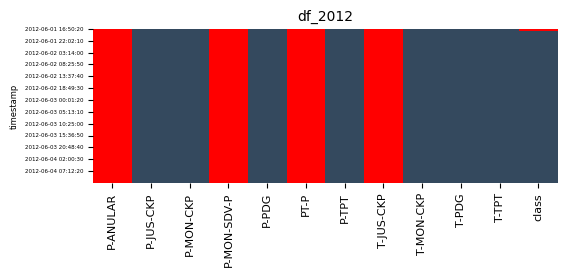

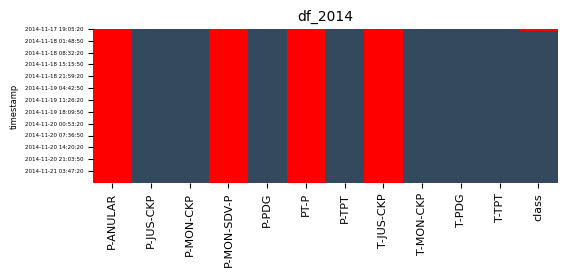

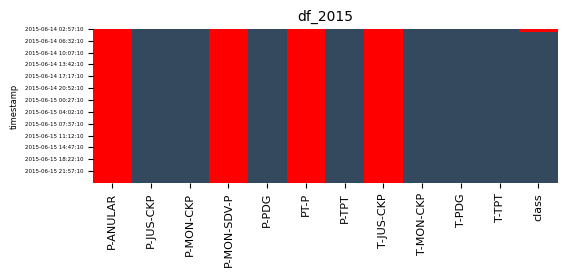

In [21]:
#Visualización de valores nulos
#df_list = [df_2012, df_2014, df_2015]
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():

#for data in df_list:
  plt.figure(figsize=(6,2))

  colours = ['#34495E', 'red']
  ax = plt.axes()
  ax.set_title(name, fontsize=10)

  plt.xticks(fontsize=8) # Adjust font size for x-axis labels
  plt.yticks(fontsize=8)
  ax.set_ylabel('ylabel', fontsize=6)

  sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette(colours), xticklabels=True, ax=ax)
  ticklabels = [data.index[int(tick)].strftime('%Y-%m-%d %H:%M:%S') for tick in ax.get_yticks()]
  ax.set_yticklabels(ticklabels, fontsize=4);
  plt.show()

In [22]:
#Columnas completamente nulas
def get_all_null_columns(df): #Función para listar columnas con todos sus valores nulos
  return [col for col in df.columns if df[col].isnull().all()]

df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
    null_columns = get_all_null_columns(data)
    print("null columns", name, null_columns)


null columns df_2012 ['P-ANULAR', 'P-MON-SDV-P', 'PT-P', 'T-JUS-CKP']
null columns df_2014 ['P-ANULAR', 'P-MON-SDV-P', 'PT-P', 'T-JUS-CKP']
null columns df_2015 ['P-ANULAR', 'P-MON-SDV-P', 'PT-P', 'T-JUS-CKP']


In [23]:
# Tratamiento de nulos - ELiminación de columnas completamente nulas
null_columns_any_df = ['P-ANULAR', 'P-MON-SDV-P', 'PT-P', 'T-JUS-CKP']
df_2012 = df_2012.drop(columns=null_columns_any_df)
df_2014 = df_2014.drop(columns=null_columns_any_df)
df_2015 = df_2015.drop(columns=null_columns_any_df)


In [24]:
#Período sin etiqueta de clase
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
  df = data.copy()
  print(name, df.shape)
  print("Período de datos:", name, df['class'].first_valid_index() - df.index[0])

df_2012 (24314, 8)
Período de datos: df_2012 0 days 01:00:00
df_2014 (31461, 8)
Período de datos: df_2014 0 days 01:00:00
df_2015 (16761, 8)
Período de datos: df_2015 0 days 01:00:00


In [25]:
# Eliminación de filas con valores nulos en "class" (1 hora)
df_2012.dropna(subset=['class'], inplace=True) #las primeras 3600 filas (3600 segundos, 1 hora) son nulas hasta que se calibra el sensor
df_2014.dropna(subset=['class'], inplace=True)
df_2015.dropna(subset=['class'], inplace=True)

# 4. VISUALIZACIÓN Y TRATAMIENTO de VARIABLES CON BAJA VARIANZA





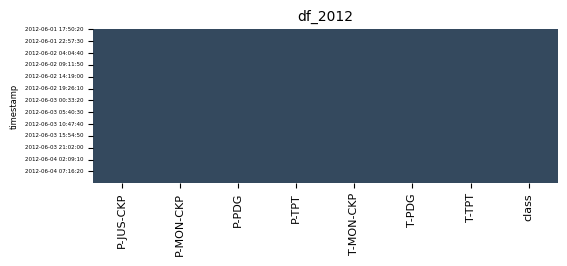

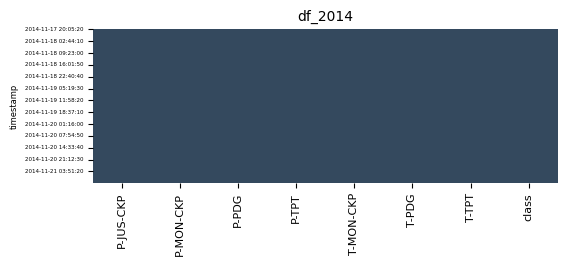

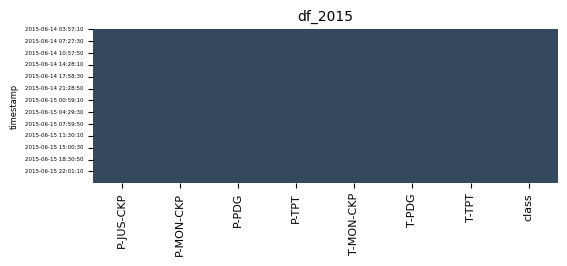

In [26]:
#Visualización de columnas con valores únicos
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

def get_single_value_columns(df):
    return [col for col in df.columns if df[col].nunique() == 1]

for name, data in df_list.items():
  cu = get_single_value_columns(data)
  df_copy = data.copy()
  df_copy.loc[:, cu] = 1
  df_copy.loc[:, ~df_copy.columns.isin(cu)]= 0
  df_copy['class'] = df_copy['class'].astype('float64') #porque si no daba error por object in class

  plt.figure(figsize=(6,2))

  colours = ['#34495E', 'red']
  ax = plt.axes()
  ax.set_title(name, fontsize=10)

  plt.xticks(fontsize=8) # Adjust font size for x-axis labels
  plt.yticks(fontsize=8)
  ax.set_ylabel('ylabel', fontsize=6)

  sns.heatmap(df_copy, cbar=False, cmap=sns.color_palette(colours), xticklabels=True, ax=ax)
  ticklabels = [df_copy.index[int(tick)].strftime('%Y-%m-%d %H:%M:%S') for tick in ax.get_yticks()]
  ax.set_yticklabels(ticklabels, fontsize=4);
  plt.show()

In [27]:
#Columnas con valores únicos (con un único valor)
def get_single_value_columns(df):
    return [col for col in df.columns if df[col].nunique() == 1]

df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
    single_value_columns = get_single_value_columns(data)
    print("single_value_columns", name, single_value_columns)

single_value_columns df_2012 []
single_value_columns df_2014 []
single_value_columns df_2015 []


In [28]:
# Eliminación de columnas con single values en cualquiera de los datasets: ['ESTADO-PXO', 'ESTADO-SDV-P', 'ESTADO-XO']
#single_value_any_df = ['ESTADO-PXO', 'ESTADO-SDV-P', 'ESTADO-XO']
#df_2012 = df_2012.drop(columns=single_value_any_df)
#df_2014 = df_2014.drop(columns=single_value_any_df)
#df_2015 = df_2015.drop(columns=single_value_any_df)


## 5.CONVERSIÓN

In [29]:
print("\nValores de 'class' en en df_2012: ", df_2012['class'].unique())
print("\nValores de 'class' en en df_2014: ", df_2014['class'].unique())
print("\nValores de 'class' en en df_2015: ", df_2015['class'].unique())


Valores de 'class' en en df_2012:  [  0. 108.   8.]

Valores de 'class' en en df_2014:  [  0. 108.   8.]

Valores de 'class' en en df_2015:  [  0. 108.   8.]


In [30]:
#Conversión de etiqueta de clase
dict_clase= {0: 'Normal', 108: 'Transitorio', 8: 'Falla'}
df_2012['class'] = df_2012['class'].map(dict_clase)
df_2014['class'] = df_2014['class'].map(dict_clase)
df_2015['class'] = df_2015['class'].map(dict_clase)

print("\nValores de 'class' en en df_2012: ", df_2012['class'].unique())
print("\nValores de 'class' en en df_2014: ", df_2014['class'].unique())
print("\nValores de 'class' en en df_2015: ", df_2015['class'].unique())


Valores de 'class' en en df_2012:  ['Normal' 'Transitorio' 'Falla']

Valores de 'class' en en df_2014:  ['Normal' 'Transitorio' 'Falla']

Valores de 'class' en en df_2015:  ['Normal' 'Transitorio' 'Falla']


In [31]:
pressure_string = '^P.*'
pres_features = df_2012.filter(regex=pressure_string , axis=1).columns

# Conversión de presión en Pa a bar (100.000 Pa = 1 bar)
df_list = [df_2012,df_2014,df_2015]

for data in df_list:
  data[pres_features] = data[pres_features].apply(lambda x: x/100000)

# 5. DATASET PREPROCESADOS

In [32]:
#datasets generados
df_2012.to_excel('df_2012_preproc_10s.xlsx')
df_2014.to_excel('df_2014_preproc_10s.xlsx')
df_2015.to_excel('df_2015_preproc_10s.xlsx')

In [33]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23954 entries, 2012-06-01 17:50:20 to 2012-06-04 12:22:30
Freq: 10s
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P-JUS-CKP  23954 non-null  float64
 1   P-MON-CKP  23954 non-null  float64
 2   P-PDG      23954 non-null  float64
 3   P-TPT      23954 non-null  float64
 4   T-MON-CKP  23954 non-null  float64
 5   T-PDG      23954 non-null  float64
 6   T-TPT      23954 non-null  float64
 7   class      23954 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.6+ MB


In [34]:
#Tamaño y período de tiempo de cada dataset
df_list = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}

for name, data in df_list.items():
  df = data.copy()
  print(name, df.shape)
  print("Período de datos:", name, df.index[-1] - df.index[0])

df_2012 (23954, 8)
Período de datos: df_2012 2 days 18:32:10
df_2014 (31101, 8)
Período de datos: df_2014 3 days 14:23:20
df_2015 (16401, 8)
Período de datos: df_2015 1 days 21:33:20


# 6. VISUALIZACIÓN DE SERIES DE TIEMPO

In [35]:
#Agrupación por variables
pressure_features = ['P-PDG', 'P-TPT', 'P-MON-CKP', 'P-JUS-CKP']
temp_features = ['T-PDG', 'T-TPT', 'T-MON-CKP']


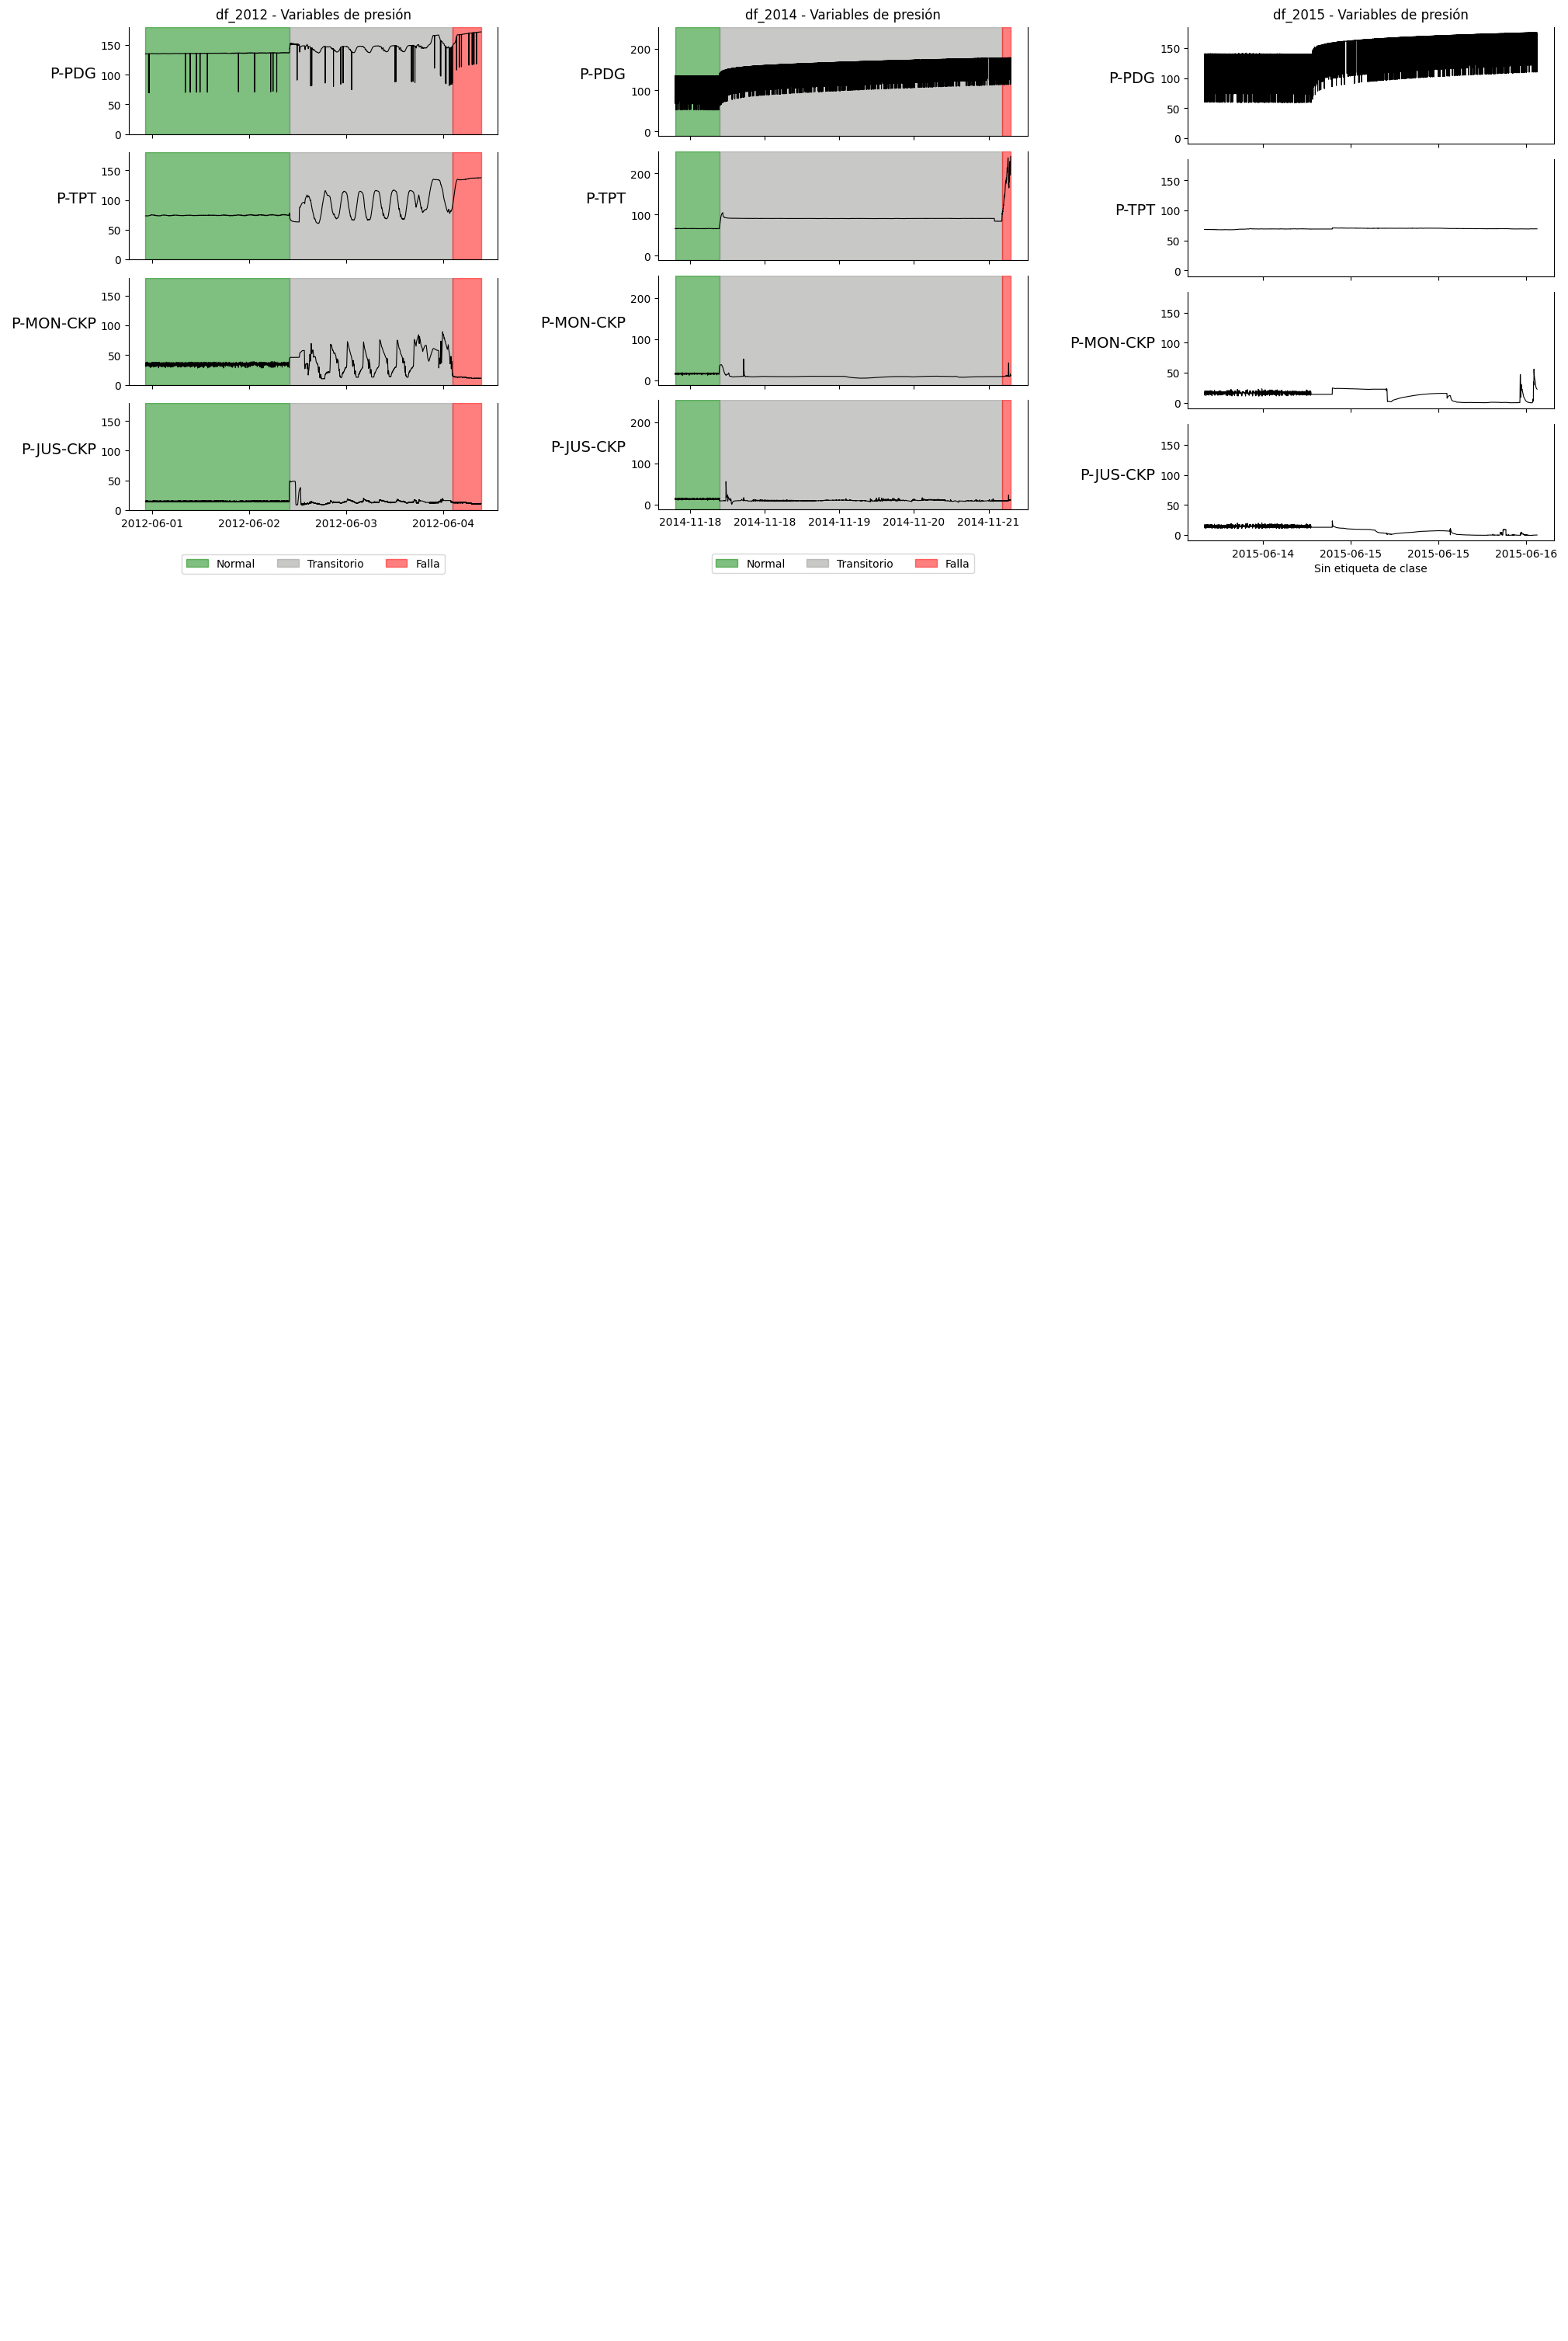

In [36]:
###Variables de presión
j = 0
plot_columns = pressure_features

filas = len(plot_columns)
fig = plt.figure(constrained_layout=True, figsize=(20, 30))
subfigs = fig.subfigures(filas, 3, wspace=0.07)
dfs = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}
for key in ['df_2012', 'df_2014']:
  df = dfs[key]
  ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

  Bgn_normal = df[df['class'] == "Normal"].index[0]
  End_normal = df[df['class'] == "Normal"].index[-1]
  Bgn_transient = df[df['class'] == "Transitorio"].index[0]
  End_transient = df[df['class'] == "Transitorio"].index[-1]
  Bgn_FaultySS = df[df['class'] == "Falla"].index[0]
  End_FaultySS = df[df['class'] == "Falla"].index[-1]

  for i in range(filas):
    ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
    ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right') #ha: horizontal alignment

    ax1[i].spines["top"].set_visible(False)
    if Bgn_normal and End_normal:
      ax1[i].axvspan(Bgn_normal, End_normal, color='green', alpha=0.5, label='Normal')
    if Bgn_transient and End_transient:
      ax1[i].axvspan(Bgn_transient, End_transient, color=sns.xkcd_rgb['grey'], alpha=0.5, label='Transitorio')
    if Bgn_FaultySS and End_FaultySS:
      ax1[i].axvspan(Bgn_FaultySS, End_FaultySS, color='red', alpha=0.5, label='Falla')

    ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))


  if df is df_2012:
        ax1[0].set_title('df_2012 - Variables de presión', y=1.02)

  elif df is df_2014:
        ax1[0].set_title('df_2014 - Variables de presión', y=1.02)

  elif df is df_2015:
        ax1[0].set_title('df_2015 - Variables de presión', y=1.02)

   # Add a legend to the last subplot (or one of them)
  if ax1.size > 0: # Check if axes is not empty
      if len(ax1.shape) == 1: # Check if axes is a 1D array
              ax1[-1].legend(loc='center', bbox_to_anchor=(0.5, -0.5), ncols=3) #ncols: numero de columnas del cuadro de legenda
      else: # If axes is a 2D array, pick one of the subplots to add the legend
              ax1[0, 0].legend(loc='best')


  j=j+1

df = df_2015
ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

for i in range(filas):
  ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
  ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right')

  ax1[i].spines["top"].set_visible(False)

  ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))

  if df is df_2012:
        ax1[0].set_title('df_2012 - Variables de presión', y=1.02)


  elif df is df_2014:
        ax1[0].set_title('df_2014 - Variables de presión', y=1.02)

  elif df is df_2015:
        ax1[0].set_title('df_2015 - Variables de presión', y=1.02)
        ax1[-1].set_xlabel('Sin etiqueta de clase', fontsize=10)

plt.show()

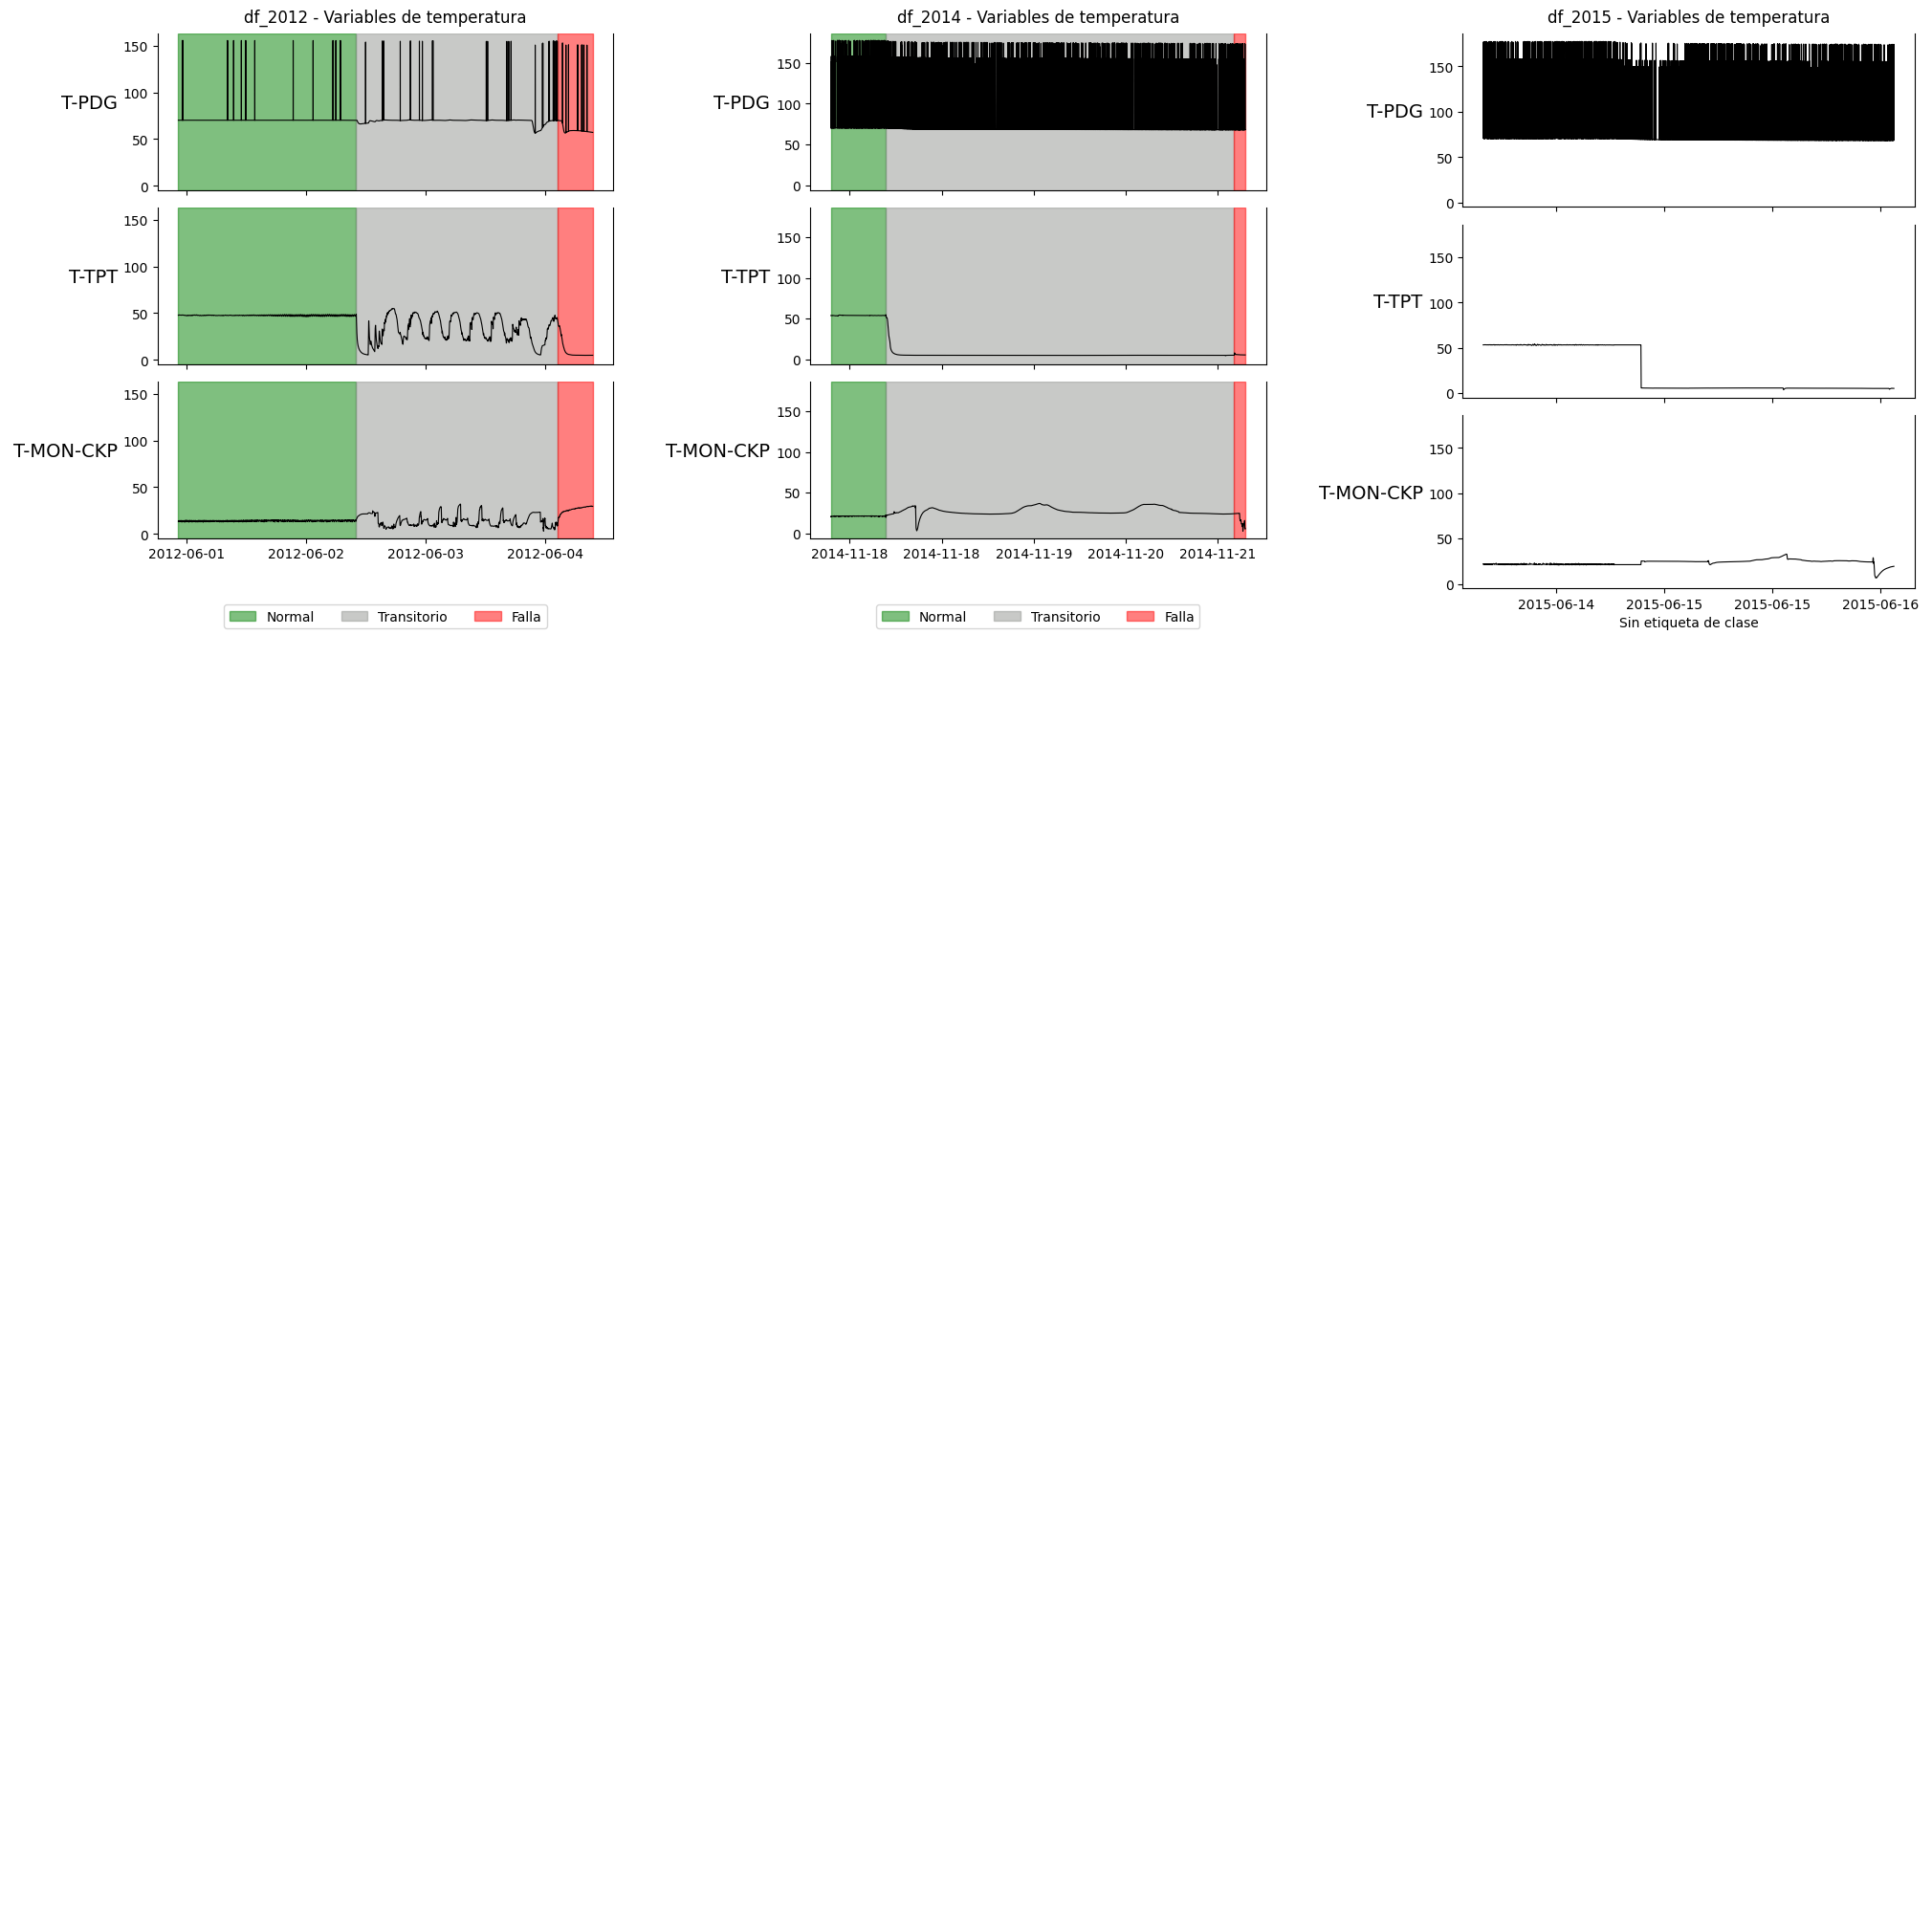

In [37]:
###Variables de Temperatura y flujo
j = 0
plot_columns = temp_features

filas = len(plot_columns)
fig = plt.figure(constrained_layout=True, figsize=(20, 20))
subfigs = fig.subfigures(filas, 3, wspace=0.07)
dfs = {'df_2012': df_2012, 'df_2014': df_2014, 'df_2015': df_2015}
for key in ['df_2012', 'df_2014']:
  df = dfs[key]
  ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

  Bgn_normal = df[df['class'] == "Normal"].index[0]
  End_normal = df[df['class'] == "Normal"].index[-1]
  Bgn_transient = df[df['class'] == "Transitorio"].index[0]
  End_transient = df[df['class'] == "Transitorio"].index[-1]
  Bgn_FaultySS = df[df['class'] == "Falla"].index[0]
  End_FaultySS = df[df['class'] == "Falla"].index[-1]

  for i in range(filas):
    ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
    ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right') #ha: horizontal alignment

    ax1[i].spines["top"].set_visible(False)
    if Bgn_normal and End_normal:
      ax1[i].axvspan(Bgn_normal, End_normal, color='green', alpha=0.5, label='Normal')
    if Bgn_transient and End_transient:
      ax1[i].axvspan(Bgn_transient, End_transient, color=sns.xkcd_rgb['grey'], alpha=0.5, label='Transitorio')
    if Bgn_FaultySS and End_FaultySS:
      ax1[i].axvspan(Bgn_FaultySS, End_FaultySS, color='red', alpha=0.5, label='Falla')


    ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))


  if df is df_2012:
        ax1[0].set_title('df_2012 - Variables de temperatura', y=1.02)

  elif df is df_2014:
        ax1[0].set_title('df_2014 - Variables de temperatura', y=1.02)

  elif df is df_2015:
        ax1[0].set_title('df_2015 - Variables de temperatura', y=1.02)

   # Add a legend to the last subplot (or one of them)
  if ax1.size > 0: # Check if axes is not empty
      if len(ax1.shape) == 1: # Check if axes is a 1D array
              ax1[-1].legend(loc='center', bbox_to_anchor=(0.5, -0.5), ncols=3) #ncols: numero de columnas del cuadro de legenda
      else: # If axes is a 2D array, pick one of the subplots to add the legend
              ax1[0, 0].legend(loc='best')



  j=j+1

df = df_2015
ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

for i in range(filas):
  ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
  ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right')

  ax1[i].spines["top"].set_visible(False)


  ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))

  if df is df_2012:
        ax1[0].set_title('df_2012 - Variables de temperatura', y=1.02)


  elif df is df_2014:
        ax1[0].set_title('df_2014 - Variables de temperatura', y=1.02)

  elif df is df_2015:
        ax1[0].set_title('df_2015 - Variables de temperatura', y=1.02)
        ax1[-1].set_xlabel('Sin etiqueta de clase', fontsize=10)

plt.show()